# Entendendo a Quantização em Sinais Analógicos com um ADC

Neste notebook, exploraremos o processo de quantização em sinais analógicos utilizando um conversor analógico-digital (ADC). A quantização é um processo crucial em eletrônica digital, onde um sinal analógico contínuo é discretizado em valores digitais. 

Vamos analisar como a escolha do número de bits e da tensão de referência afetam a resolução e a fidelidade da representação digital. 

Ao final deste tutorial, você terá uma compreensão clara de como a quantização funciona e como isso impacta a representação de sinais analógicos em sistemas digitais de aquisião de dados.


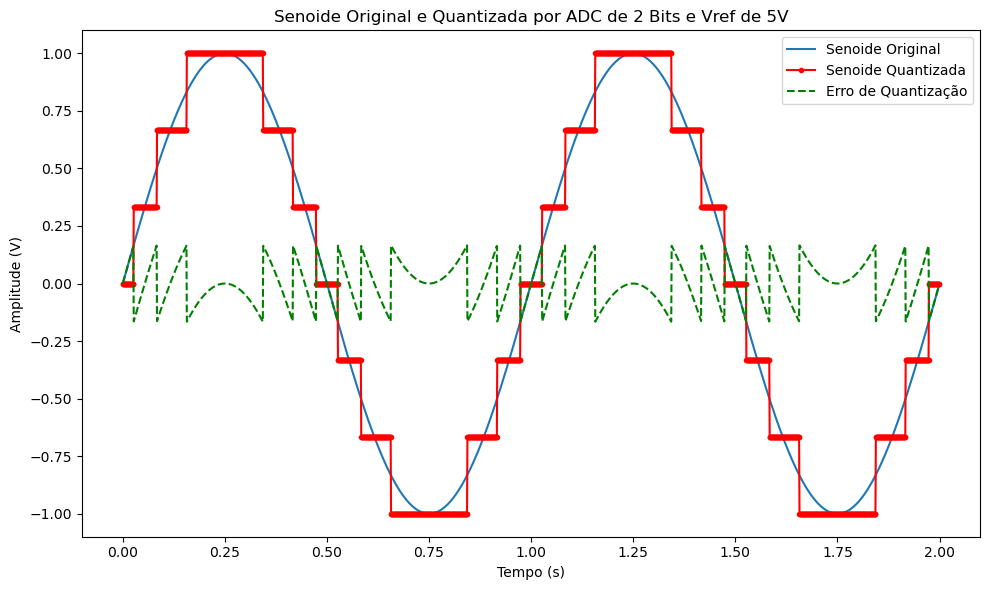

Passo de quantização:0.3333333333333333


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da senoide
frequencia = 1     # Frequência de 1 Hz
amplitude = 1      # Amplitude de 1V
Vmin = 0           # Valor mínimo da senoide (deslocada)
periodo = 1 / frequencia

# Parâmetros do ADC (menos bits e Vref maior)
bits = 4           # Número de bits do ADC (2 bits)
Vref = 5.0         # Tensão de referência de 5V

# Gere a senoide
tempo = np.arange(0, 2 * periodo, 1/1000)  # 2 períodos completos, mais pontos
senoide = amplitude * np.sin(2 * np.pi * frequencia * tempo) + Vmin

# Quantização
passo_quantizacao = Vref / (2 ** bits-1)  # Passo de quantização
senoide_quantizada = np.round((senoide - Vmin) / passo_quantizacao) * passo_quantizacao + Vmin

# Erro de quantização
erro_quantizacao = senoide - senoide_quantizada

# Plote os resultados na mesma imagem
plt.figure(figsize=(10, 6))

plt.plot(tempo, senoide, label='Senoide Original')
plt.plot(tempo, senoide_quantizada, label='Senoide Quantizada', color='red', marker='o', linestyle='-', markersize=3)
plt.plot(tempo, erro_quantizacao, label='Erro de Quantização', color='green', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (V)')
plt.title('Senoide Original e Quantizada por ADC de 2 Bits e Vref de 5V')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Passo de quantização:{passo_quantizacao}')